In [1]:
import pandas
import numpy as np

In [168]:
POLLS_FILE = "PMbPp.csv"

wisconsin = pandas.read_csv(POLLS_FILE)
STATE = wisconsin["Contest"][0]

In [172]:
wisconsin["SampleInteger"] = wisconsin["Sample"].apply(lambda x: int(x.split("@@")[1]))

In [173]:
margins = (wisconsin["Harris"] - wisconsin["Trump"]) / (wisconsin["Harris"] + wisconsin["Trump"])
wisconsin["AbsoluteMargin"] = np.absolute(margins)
wisconsin["AbsoluteMargin"]

0     0.026455
1     0.020408
2     0.005236
3     0.005661
4     0.011765
        ...   
95    0.005405
96    0.005348
97    0.043478
98    0.047120
99    0.021277
Name: AbsoluteMargin, Length: 100, dtype: float64

In [174]:
# The total number of poll respondents in each poll who said they planned to vote for either Harris or Trump:
# np.ceil rounds up; this would decrease variance and is therefore being generous to the pollsters
wisconsin["HarrisOrTrumpTotal"] = np.ceil(wisconsin["SampleInteger"] * ((wisconsin["Harris"] + wisconsin["Trump"]) / 100)).astype(int)
wisconsin["HarrisOrTrumpTotal"]

0     1234
1     1304
2      794
3     1429
4      712
      ... 
95     648
96    1028
97     432
98     705
99     376
Name: HarrisOrTrumpTotal, Length: 100, dtype: int64

In [175]:
mean_observed_absolute_margin = wisconsin["AbsoluteMargin"].mean()
print(f"Observed mean absolute margin across all polls in {STATE}: {100 * mean_observed_absolute_margin:.2f}%")

Observed average absolute margin across all polls in Wisconsin: 2.03%


In [228]:
def simulate_poll(n: int, probability: float = 0.5) -> float:
    """Simulate poll of `n` planned Harris/Trump voters; return the absolute margin"""
    responses = np.random.random(n) > probability
    margin = (responses.mean() - 0.5) * 2
    absolute_margin = np.abs(margin)
    return absolute_margin

In [258]:
# Simulate many polls
def simulate_universe(sample_sizes: list[int], print_results: bool = False) -> float:
    absolute_margins = []
    for n in sample_sizes:
        absolute_margin = simulate_poll(n)
        if print_results:
            print(f"Simulated poll of size {n} produced absolute margin of {absolute_margin:.4f}")
        absolute_margins.append(absolute_margin)
    mean_absolute_margin = np.mean(absolute_margins)
    if print_results:
        print(f"{mean_absolute_margin=:.4f}")
    return mean_absolute_margin

simulate_universe(wisconsin["HarrisOrTrumpTotal"], print_results=True)

Simulated poll of size 1234 produced absolute margin of 0.0454
Simulated poll of size 1304 produced absolute margin of 0.1089
Simulated poll of size 794 produced absolute margin of 0.0076
Simulated poll of size 1429 produced absolute margin of 0.0049
Simulated poll of size 712 produced absolute margin of 0.0337
Simulated poll of size 833 produced absolute margin of 0.0588
Simulated poll of size 655 produced absolute margin of 0.0412
Simulated poll of size 582 produced absolute margin of 0.0481
Simulated poll of size 816 produced absolute margin of 0.0147
Simulated poll of size 793 produced absolute margin of 0.0921
Simulated poll of size 776 produced absolute margin of 0.0000
Simulated poll of size 712 produced absolute margin of 0.0365
Simulated poll of size 760 produced absolute margin of 0.0474
Simulated poll of size 1064 produced absolute margin of 0.0414
Simulated poll of size 473 produced absolute margin of 0.0655
Simulated poll of size 707 produced absolute margin of 0.0693
Simu

np.float64(0.034701436246050495)

In [261]:
# Simulate all Wisconsin polls in many different universes:
NUMBER_OF_UNIVERSES = 100_000

mean_absolute_margins = []
for _ in range(NUMBER_OF_UNIVERSES):
    # Simulate the polls in this universe, then calculate the mean absolute margin:
    mean_absolute_margin = simulate_universe(wisconsin["HarrisOrTrumpTotal"])
    mean_absolute_margins.append(mean_absolute_margin)
mean_absolute_margins = np.array(mean_absolute_margins)


In [263]:
print(f"Mean absolute margin across all universes: {100 * mean_absolute_margins.mean():.2f}%")
simulated_mean_absolute_margins_above_observed = np.sum(mean_absolute_margins > np.mean(wisconsin["AbsoluteMargin"]))
share_above_observed = simulated_mean_absolute_margins_above_observed / NUMBER_OF_UNIVERSES
print(f"Across {NUMBER_OF_UNIVERSES} simulated universes, {simulated_mean_absolute_margins_above_observed} ({100 * share_above_observed:.4f}%) had a higher mean absolute margin than the one observed by pollsters in Wisconsin ({100 * mean_observed_absolute_margin:.2f}%)")


Mean absolute margin across all universes: 3.05%
Across 100000 simulated universes, 100000 (100.0000%) had a higher mean absolute margin than the one observed by pollsters in Wisconsin (2.03%)


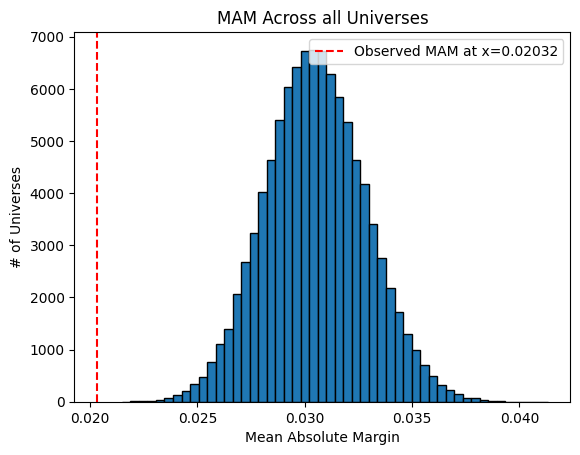

In [272]:
import matplotlib.pyplot as plt

plt.hist(mean_absolute_margins, bins=50, edgecolor='black')
plt.xlabel('Mean Absolute Margin')
plt.ylabel('# of Universes')
plt.title('MAM Across all Universes')

plt.axvline(x=mean_observed_absolute_margin, color='red', linestyle='--', linewidth=1.5, label=f'Observed MAM at x={mean_observed_absolute_margin:.5f}')

plt.legend()
plt.show()



In [273]:
np.percentile(mean_absolute_margins, [0.01, 1, 5, 25, 50, 75, 95, 99, 99.99])

array([0.0223823 , 0.02522942, 0.02674275, 0.02891478, 0.03046063,
       0.03206623, 0.03443014, 0.0360866 , 0.03944749])

In [274]:
mean_absolute_margins.min()

np.float64(0.02148048679558846)